In [1]:
%load_ext autoreload
%autoreload

In [2]:
%matplotlib inline 

import sys
import os

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp

sys.path.append('..')
from env_config import DATA_PATH, PROJECT_PATH
from utils import get_config, read_fits_to_pandas, read_correlations
from plotting import plot_many_correlations_comparison
from experiment import Experiment
from plotting import my_mollview, plot_correlation_matrix, plot_correlation

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set(style='ticks')
pd.set_option('mode.chained_assignment', None)

In [4]:
data_name = 'KiDS_QSO'

# Run correlations

In [5]:
config = get_config(data_name)
experiment = Experiment(config, set_data=True, set_maps=True)

16/05/2022 12:32:45 INFO: Setting data..
16/05/2022 12:32:45 INFO: Setting maps..
16/05/2022 12:32:45 INFO: Sigma is 0.000000 arcmin (0.000000 rad) 
16/05/2022 12:32:45 INFO: -> fwhm is 0.000000 arcmin
16/05/2022 12:32:46 INFO: NSIDE = 2048
16/05/2022 12:32:46 INFO: ORDERING = RING in fits file
16/05/2022 12:32:46 INFO: INDXSCHM = IMPLICIT


In [6]:
experiment.set_correlations()

16/05/2022 12:33:00 INFO: Setting data correlations..
16/05/2022 12:33:03 INFO: Setting theory correlations..
16/05/2022 12:33:03 INFO: Setting covariance..


In [ ]:
save_correlations(experiment)

# Correlations

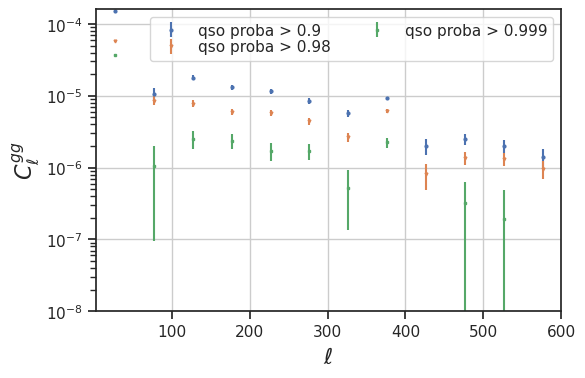

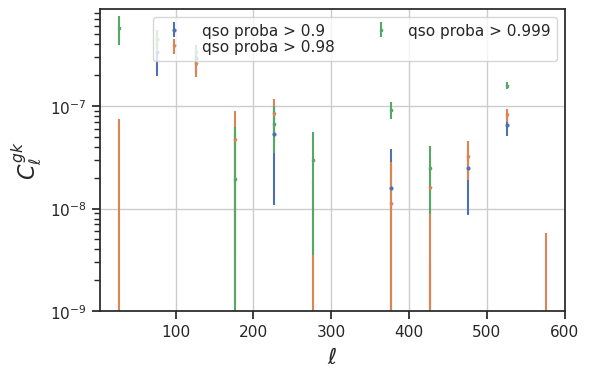

In [15]:
corr_dict = {}
r_max = 23
for qso_min_proba in [0.9, 0.98, 0.999]:
    file_name = 'KiDS_QSO/KiDS_QSO__mask_coverage__r-max={}_qso-min-proba={}_nside=512_gg-gk_bin=50'.format(r_max, qso_min_proba)
    corr_dict['qso proba > {}'.format(qso_min_proba)] = read_correlations(file_name)

plot_many_correlations_comparison(corr_dict, correlation_symbol='gg', x_min=2, x_max=600, y_min=1e-8, y_max=None)
plot_many_correlations_comparison(corr_dict, correlation_symbol='gk', x_min=2, x_max=600, y_min=1e-9, y_max=None)

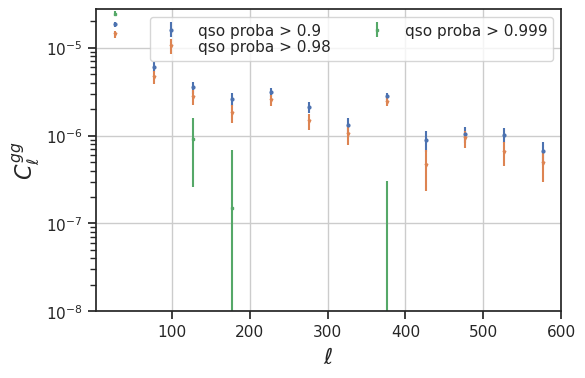

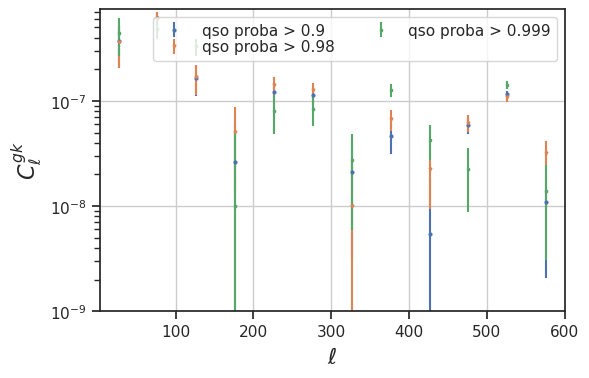

In [14]:
corr_dict = {}
r_max = 22
for qso_min_proba in [0.9, 0.98, 0.999]:
    file_name = 'KiDS_QSO/KiDS_QSO__mask_coverage__r-max={}_qso-min-proba={}_nside=512_gg-gk_bin=50'.format(r_max, qso_min_proba)
    corr_dict['qso proba > {}'.format(qso_min_proba)] = read_correlations(file_name)

plot_many_correlations_comparison(corr_dict, correlation_symbol='gg', x_min=2, x_max=600, y_min=1e-8, y_max=None)
plot_many_correlations_comparison(corr_dict, correlation_symbol='gk', x_min=2, x_max=600, y_min=1e-9, y_max=None)

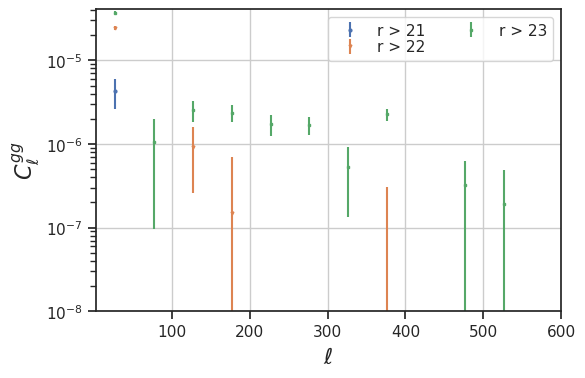

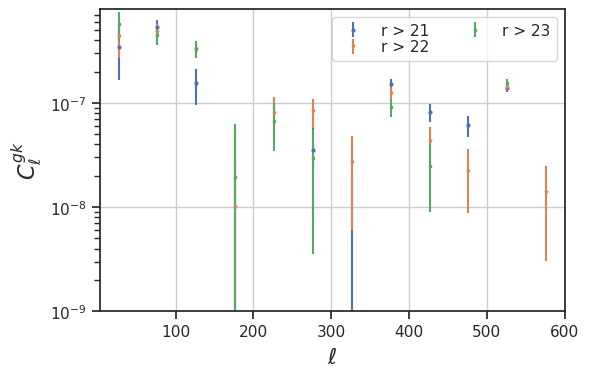

In [13]:
corr_dict = {}
qso_min_proba = 0.999
for r_max in [21, 22, 23]:
    file_name = 'KiDS_QSO/KiDS_QSO__mask_coverage__r-max={}_qso-min-proba={}_nside=512_gg-gk_bin=50'.format(r_max, qso_min_proba)
    corr_dict['r > {}'.format(r_max)] = read_correlations(file_name)

plot_many_correlations_comparison(corr_dict, correlation_symbol='gg', x_min=2, x_max=600, y_min=1e-8, y_max=None)
plot_many_correlations_comparison(corr_dict, correlation_symbol='gk', x_min=2, x_max=600, y_min=1e-9, y_max=None)

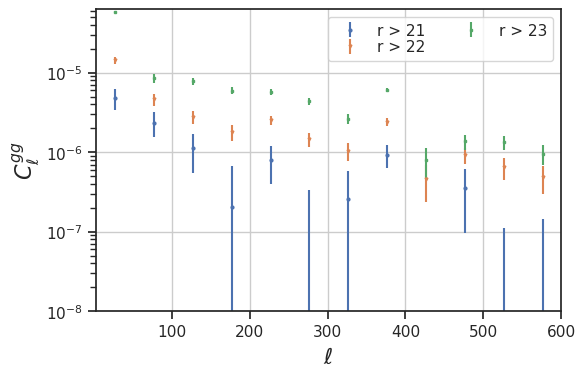

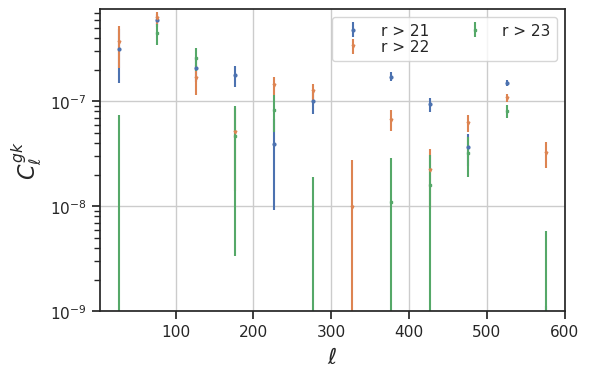

In [10]:
corr_dict = {}
qso_min_proba = 0.98
for r_max in [21, 22, 23]:
    file_name = 'KiDS_QSO/KiDS_QSO__mask_coverage__r-max={}_qso-min-proba={}_nside=512_gg-gk_bin=50'.format(r_max, qso_min_proba)
    corr_dict['r > {}'.format(r_max)] = read_correlations(file_name)

plot_many_correlations_comparison(corr_dict, correlation_symbol='gg', x_min=2, x_max=600, y_min=1e-8, y_max=None)
plot_many_correlations_comparison(corr_dict, correlation_symbol='gk', x_min=2, x_max=600, y_min=1e-9, y_max=None)

## Magnitudes

In [ ]:
# r < 20
experiment.print_correlation_statistics()

C_gg sigma: 8.08
C_gg chi squared: 368.03
C_gk sigma: 8.31
C_gk chi squared: 78.62


In [7]:
# r < 21
experiment.print_correlation_statistics()

C_gg sigma: 49.76
C_gg chi squared: 15.72
C_gk sigma: 13.37
C_gk chi squared: 98.81


In [8]:
# r < 21.5
experiment.print_correlation_statistics()

C_gg sigma: 60.20
C_gg chi squared: 117.37
C_gk sigma: 13.19
C_gk chi squared: 99.54


In [8]:
# r < 22
experiment.print_correlation_statistics()

C_gg sigma: 44.96
C_gg chi squared: 239.35
C_gk sigma: 11.24
C_gk chi squared: 52.06


In [7]:
# r < 22.5
experiment.print_correlation_statistics()

C_gg sigma: 85.54
C_gg chi squared: 2370.97
C_gk sigma: 5.65
C_gk chi squared: 189.70


In [8]:
# r < 23
experiment.print_correlation_statistics()

C_gg sigma: 115.61
C_gg chi squared: 12695.65
C_gk sigma: 0.00
C_gk chi squared: 429.13


In [ ]:
# r < 23.5
experiment.print_correlation_statistics()

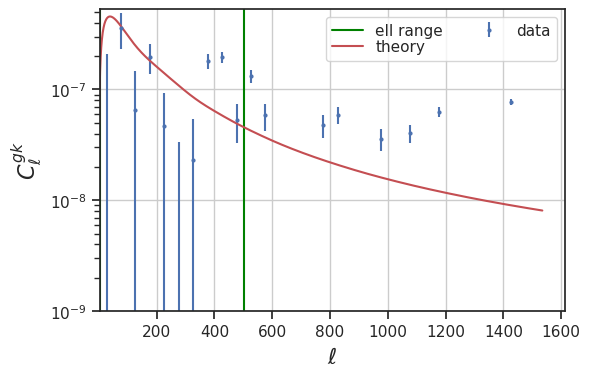

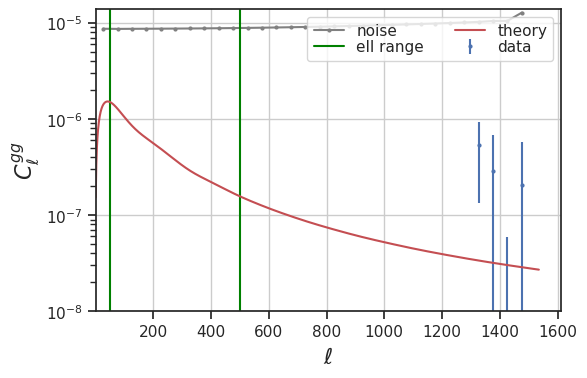

In [8]:
# r < 20
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

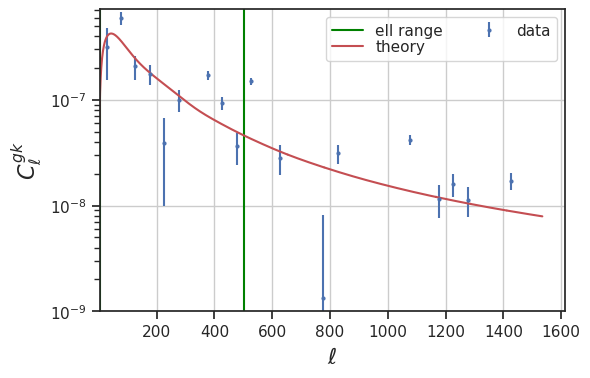

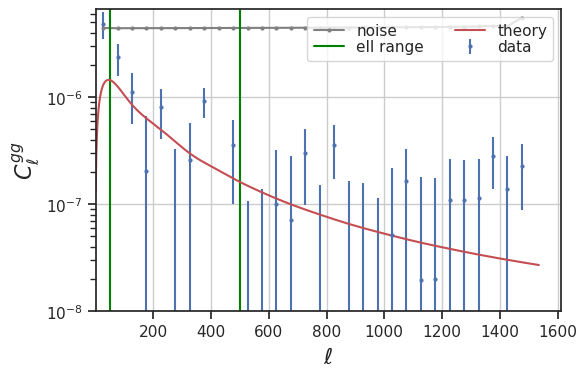

In [8]:
# r < 21
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

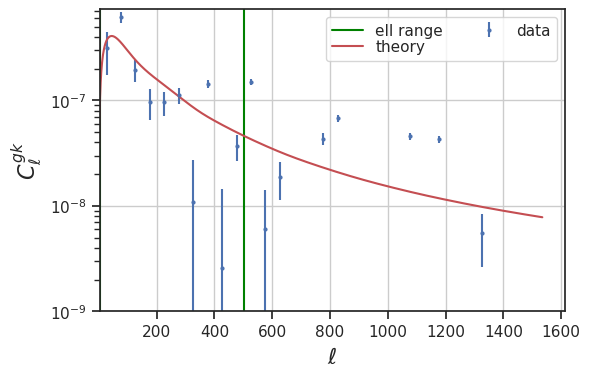

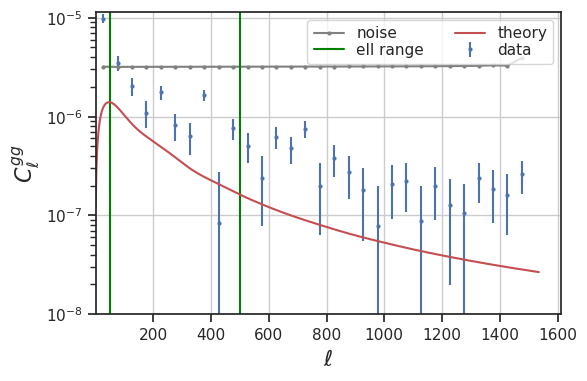

In [9]:
# r < 21.5
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

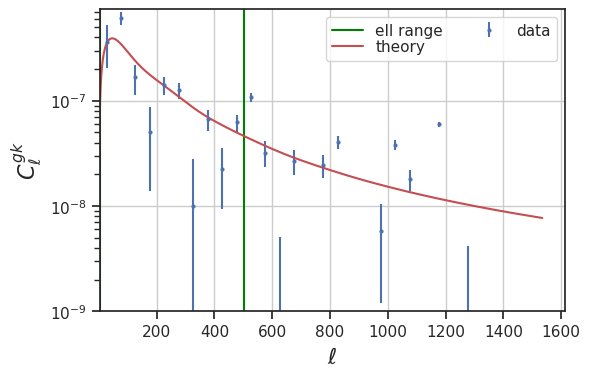

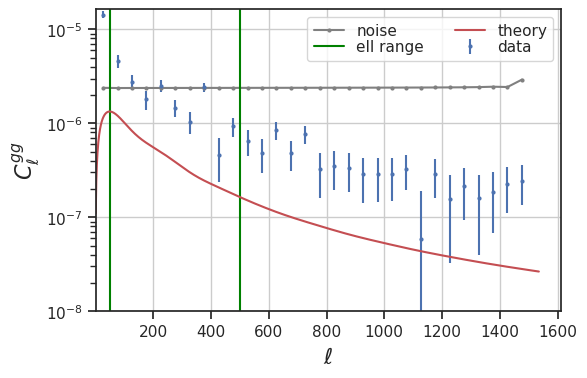

In [7]:
# r < 22
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

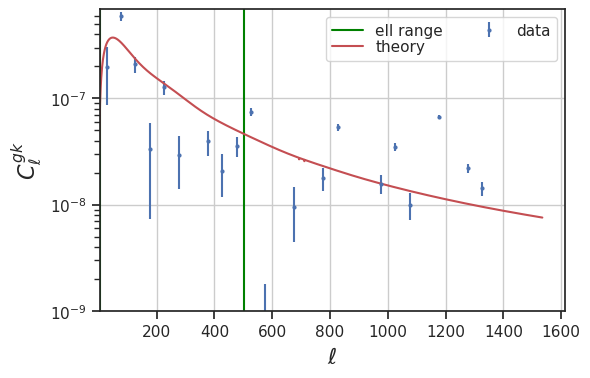

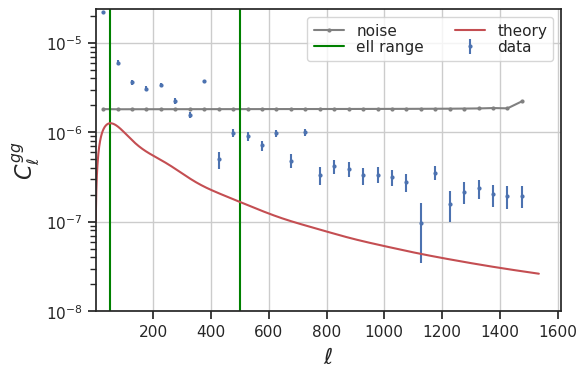

In [8]:
# r < 22.5
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

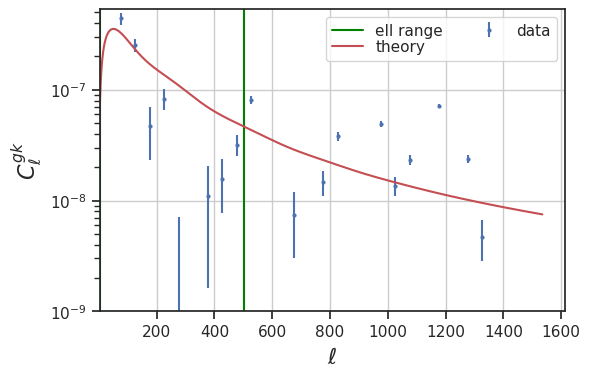

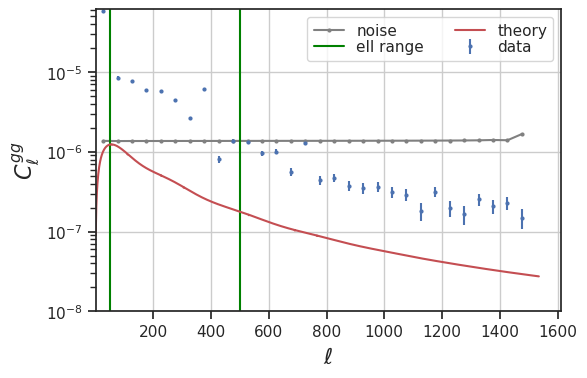

In [9]:
# r < 23
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

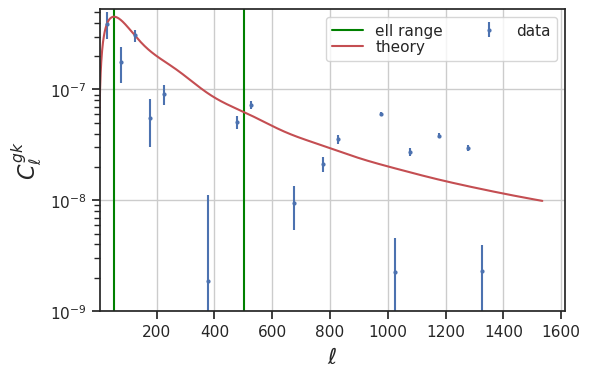

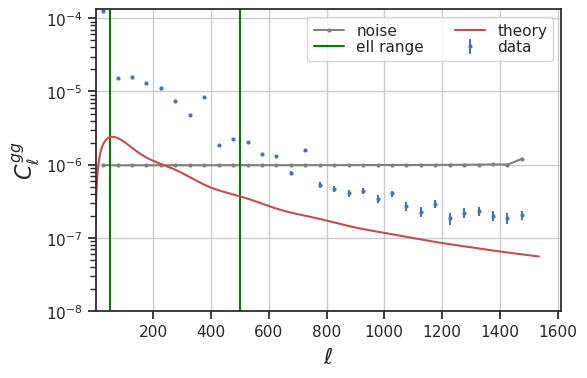

In [10]:
# r < 23.5
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

## North vs south

In [9]:
# North sky, r < 22
experiment.print_correlation_statistics()

C_gg sigma: 50.90
C_gg chi squared: 335.64
C_gk sigma: 11.83
C_gk chi squared: 150.09


In [8]:
# South sky, r < 22
experiment.print_correlation_statistics()

C_gg sigma: 49.79
C_gg chi squared: 313.72
C_gk sigma: 8.20
C_gk chi squared: 138.40


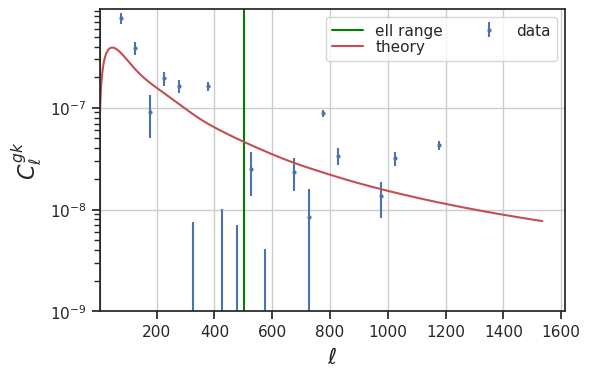

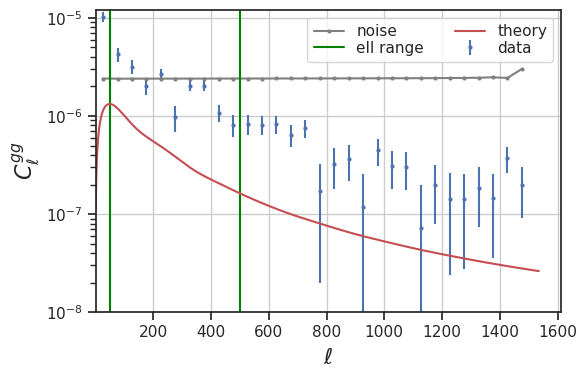

In [10]:
# r < 22, north sky
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

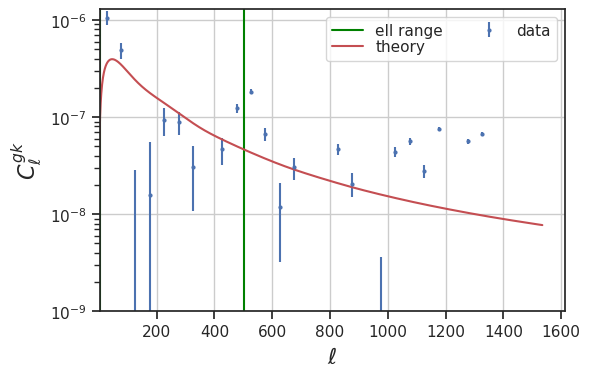

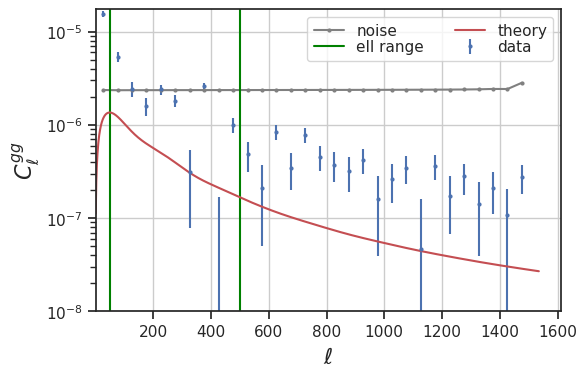

In [9]:
# r < 22, south sky
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

# Data

In [5]:
# Read QSO candidates
qsos_filepath = os.path.join(DATA_PATH, 'KiDS/DR4/catalogs/published/KiDS_DR4_QSO_candidates.fits')
qsos = read_fits_to_pandas(qsos_filepath)

# Read KiDS subset with errors
kids_filepath = os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.columns.fits')
kids = read_fits_to_pandas(kids_filepath)

# Merge
qsos = pd.merge(qsos, kids[['ID', 'MAG_AUTO', 'MAGERR_AUTO', 'MAGERR_GAAP_r']], on='ID')

In [22]:
qsos_to_plot = qsos[['MAG_GAAP_r', 'MAGERR_GAAP_r', 'CLASS_STAR', 'QSO_PHOTO', 'Z_PHOTO_QSO', 'Z_PHOTO_STDDEV_QSO']]
qsos_safe = qsos_to_plot.loc[(qsos['MAG_GAAP_r'] < 22) & (qsos['QSO_PHOTO'] > 0.98)]
qsos_extrap = qsos_to_plot.loc[(qsos['MAG_GAAP_r'] < 23.5) & (qsos['QSO_PHOTO'] > 0.98)]

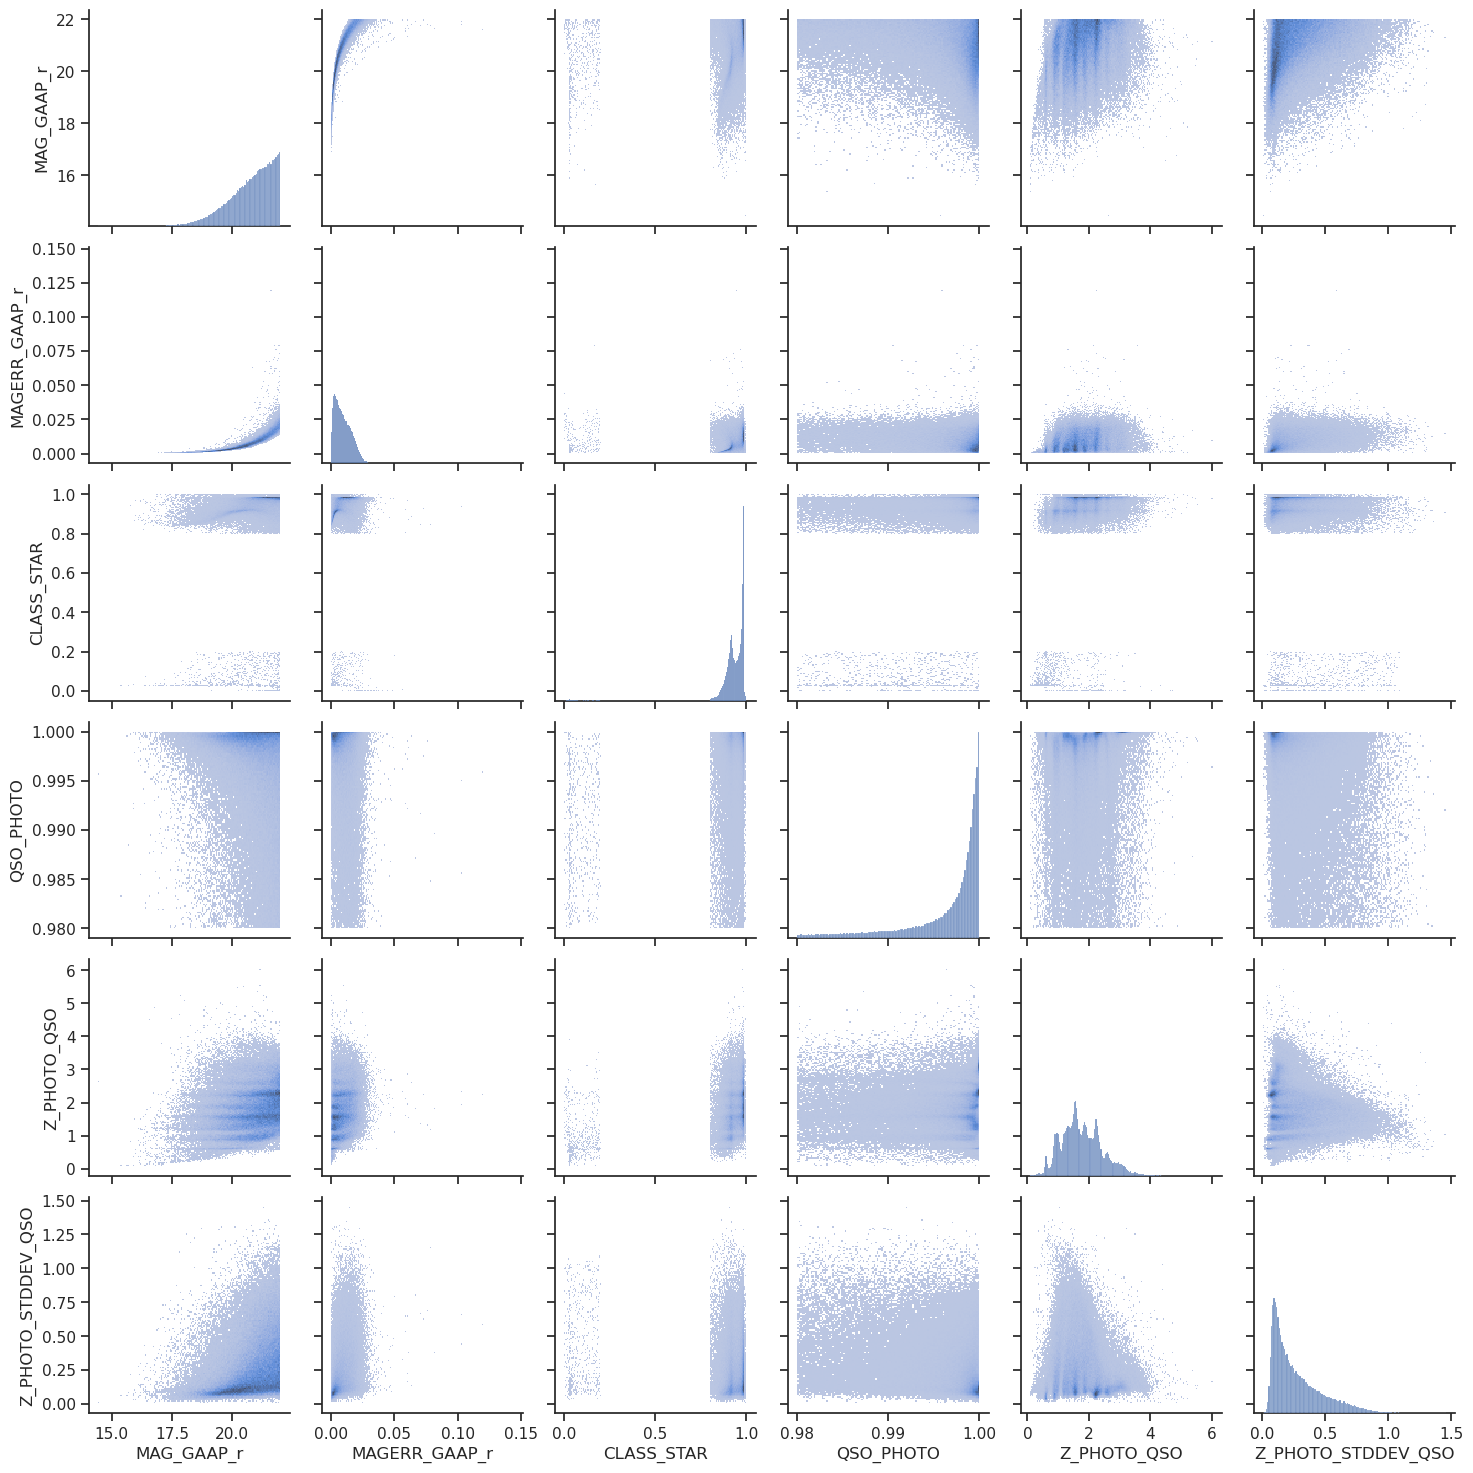

In [23]:
sns.pairplot(qsos_safe, kind='hist')

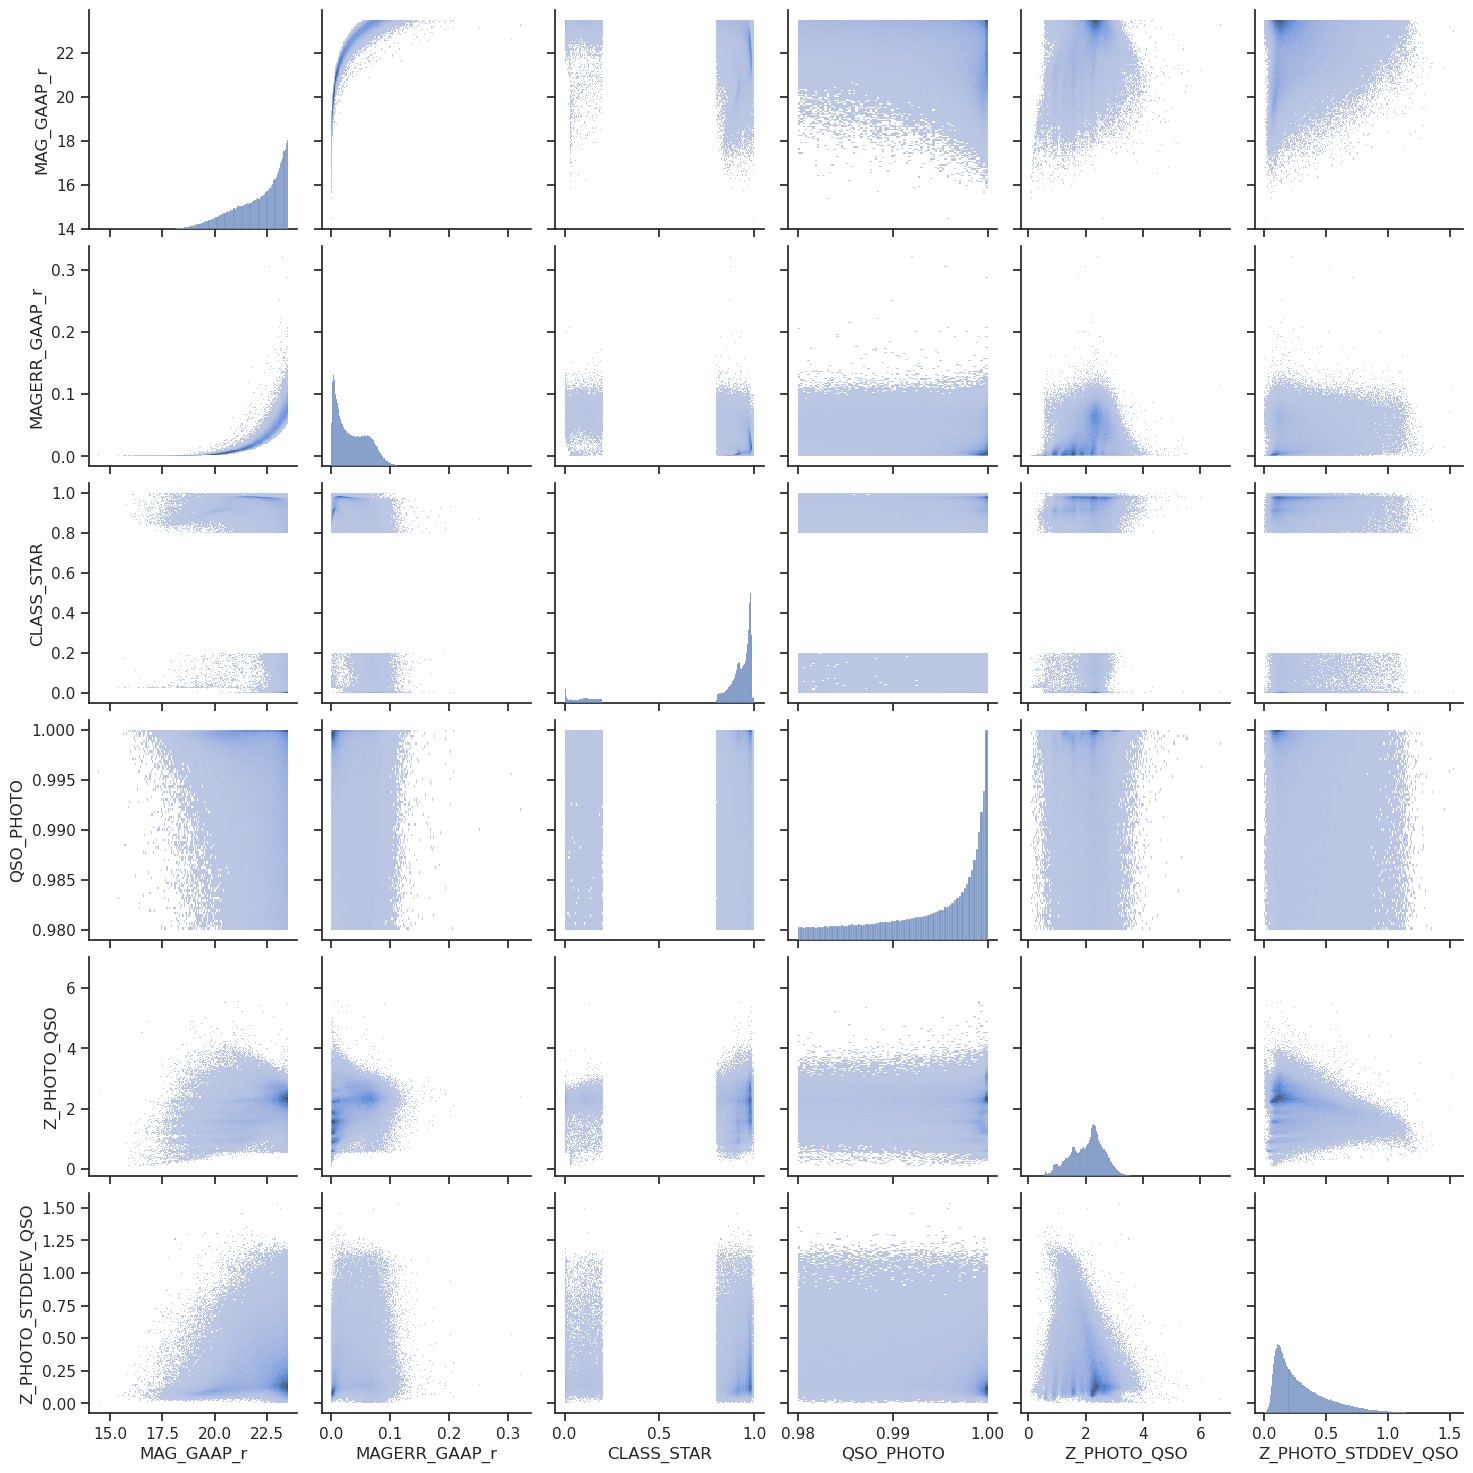

In [24]:
sns.pairplot(qsos_extrap, kind='hist')

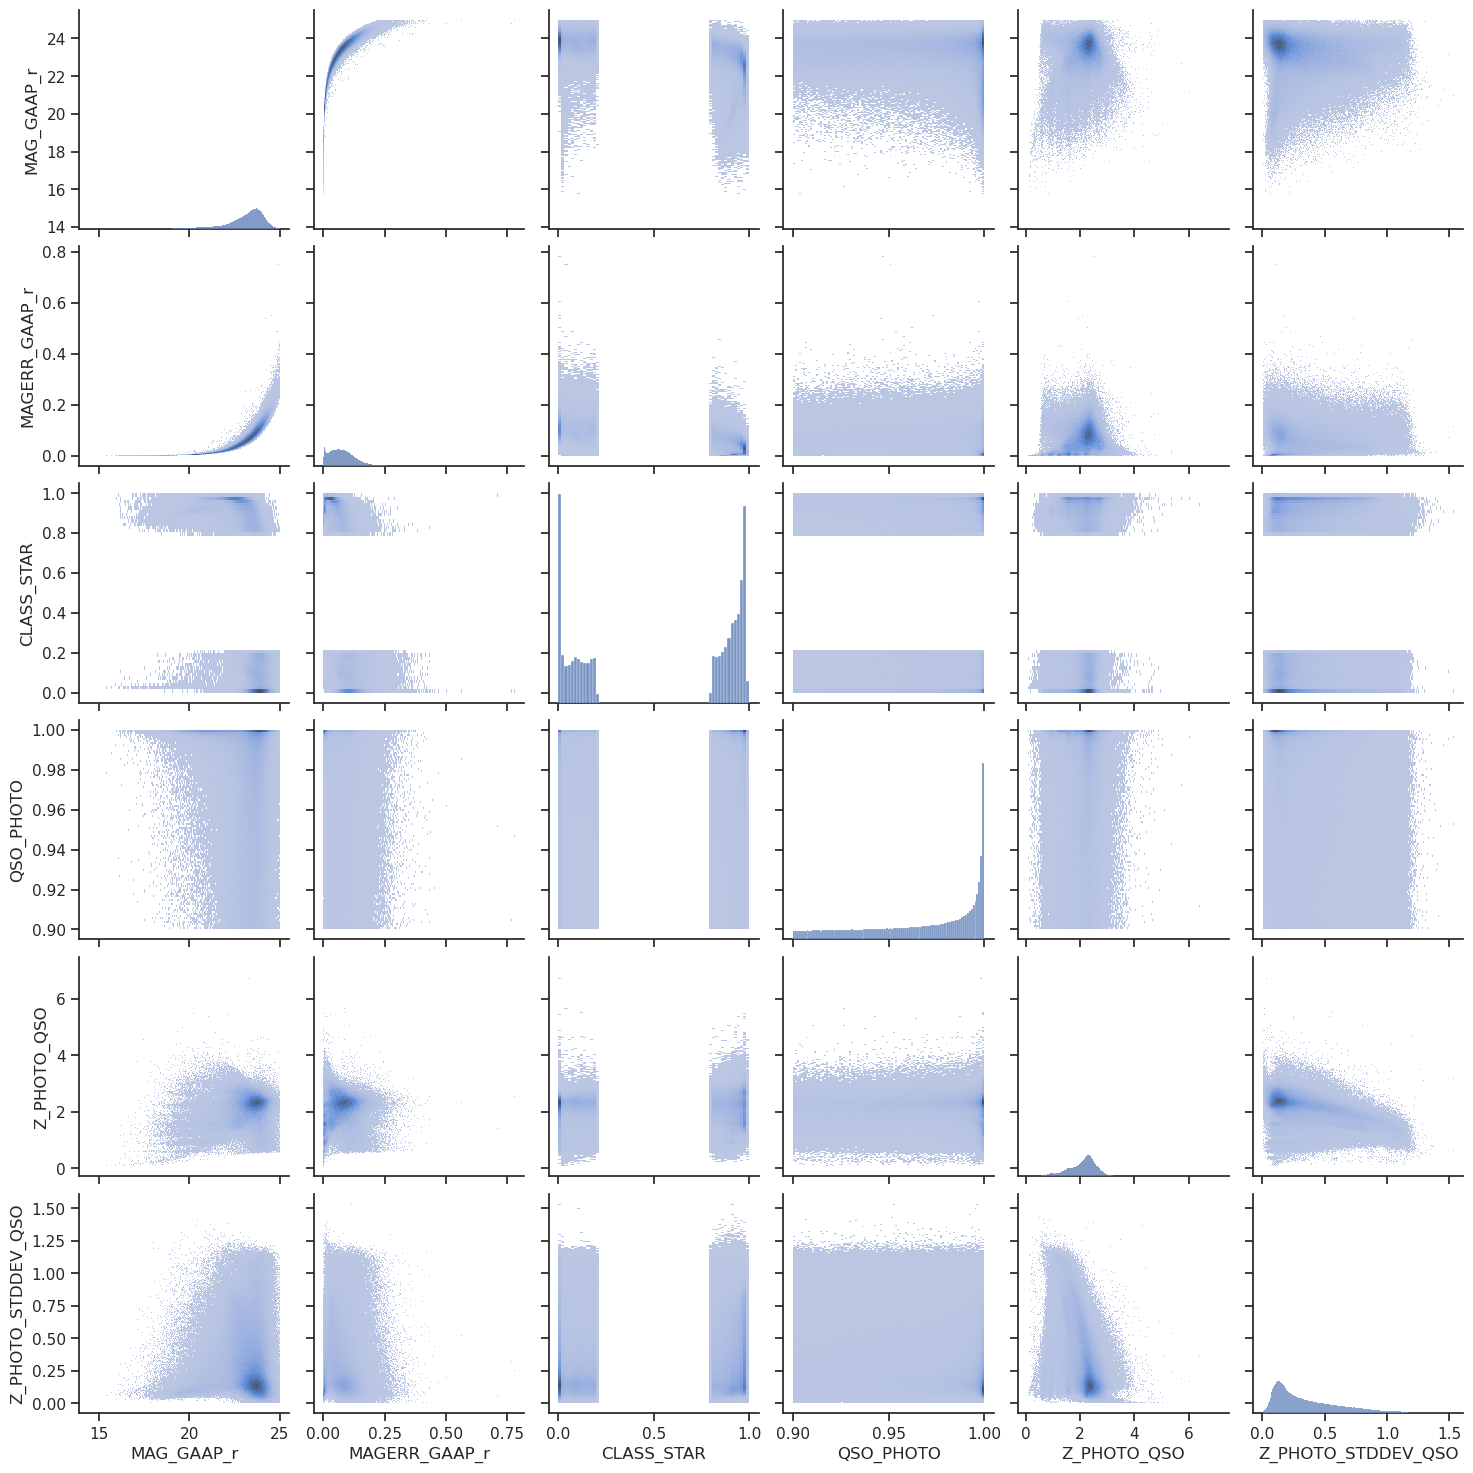

In [28]:
sns.pairplot(qsos_to_plot, kind='hist')

<AxesSubplot:xlabel='Z_PHOTO_QSO', ylabel='Count'>

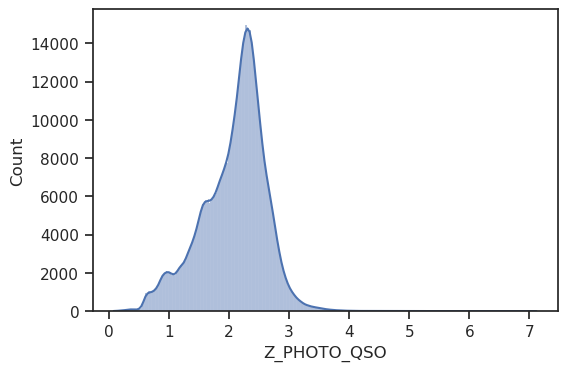

In [30]:
sns.histplot(data=qsos_to_plot, x='Z_PHOTO_QSO', kde=True)

<AxesSubplot:xlabel='Z_PHOTO_QSO', ylabel='Count'>

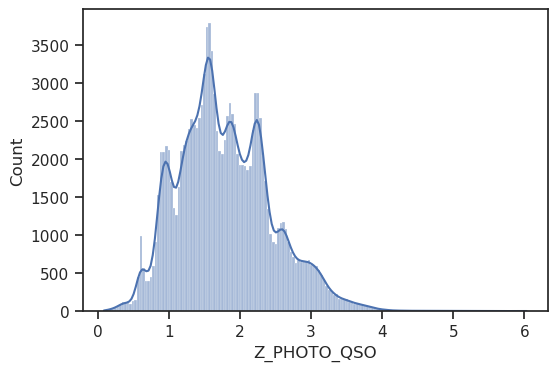

In [31]:
sns.histplot(data=qsos_safe, x='Z_PHOTO_QSO', kde=True)

<AxesSubplot:xlabel='Z_PHOTO_QSO', ylabel='Count'>

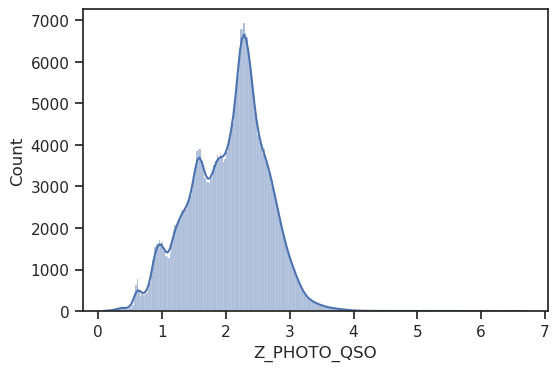

In [32]:
sns.histplot(data=qsos_extrap, x='Z_PHOTO_QSO', kde=True)

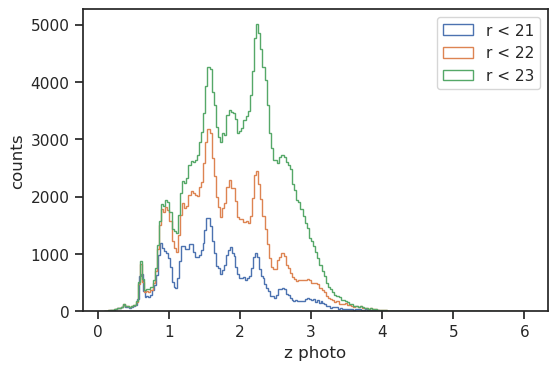

In [51]:
for r_max in [21, 22, 23]:
    plt.hist(qsos_extrap.loc[qsos_extrap['MAG_GAAP_r'] < r_max]['Z_PHOTO_QSO'], 200, label='r < {}'.format(r_max), histtype='step')
    # sns.histplot(data=, x='Z_PHOTO_QSO', kde=True, )
plt.xlabel('z photo')
plt.ylabel('counts')
plt.legend()

# Maps

06/05/2022 15:10:24 WARNING: 0.0 180.0 -180.0 180.0
06/05/2022 15:10:24 INFO: The interval between parallels is 30 deg -0.00'.
06/05/2022 15:10:24 INFO: The interval between meridians is 30 deg -0.00'.
06/05/2022 15:10:24 WARNING: 82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
06/05/2022 15:10:24 INFO: The interval between parallels is 1 deg 0.00'.
06/05/2022 15:10:24 INFO: The interval between meridians is 1 deg 0.00'.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
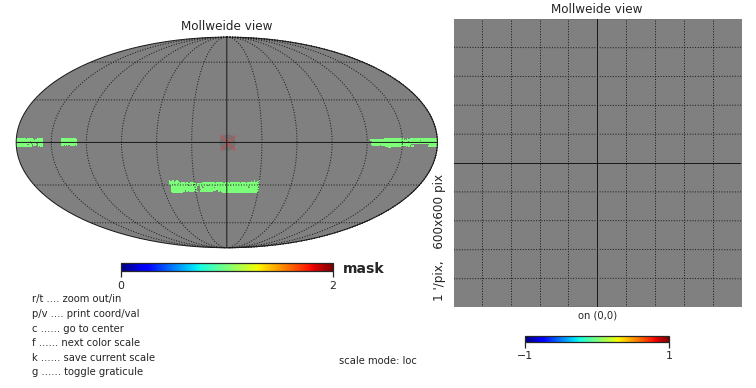

In [ ]:
%matplotlib widget
my_mollview(experiment.masks['g'], unit='mask', fwhm=0, zoom=True)

06/05/2022 15:12:18 INFO: Sigma is 35.671516 arcmin (0.010376 rad) 
06/05/2022 15:12:18 INFO: -> fwhm is 84.000000 arcmin
06/05/2022 15:12:18 INFO: Sigma is 0.000000 arcmin (0.000000 rad) 
06/05/2022 15:12:18 INFO: -> fwhm is 0.000000 arcmin
06/05/2022 15:12:19 WARNING: 0.0 180.0 -180.0 180.0
06/05/2022 15:12:19 INFO: The interval between parallels is 30 deg -0.00'.
06/05/2022 15:12:19 INFO: The interval between meridians is 30 deg -0.00'.
06/05/2022 15:12:19 WARNING: 82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
06/05/2022 15:12:19 INFO: The interval between parallels is 1 deg 0.00'.
06/05/2022 15:12:19 INFO: The interval between meridians is 1 deg 0.00'.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
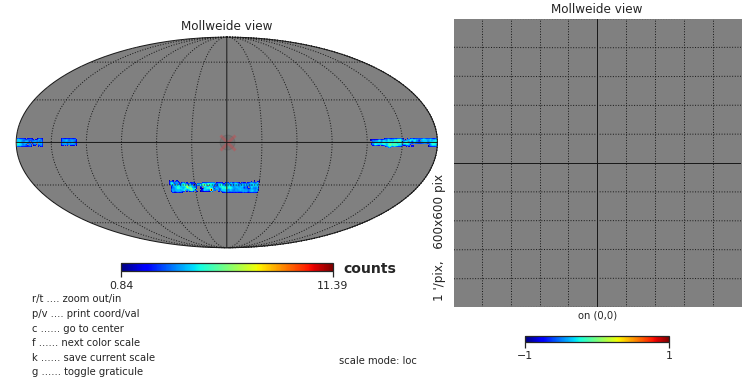

In [22]:
%matplotlib widget
my_mollview(experiment.base_maps['g'], unit='counts', fwhm=1.4, zoom=True)

06/05/2022 15:12:23 INFO: Sigma is 35.671516 arcmin (0.010376 rad) 
06/05/2022 15:12:23 INFO: -> fwhm is 84.000000 arcmin
06/05/2022 15:12:23 INFO: Sigma is 0.000000 arcmin (0.000000 rad) 
06/05/2022 15:12:23 INFO: -> fwhm is 0.000000 arcmin
06/05/2022 15:12:23 WARNING: 0.0 180.0 -180.0 180.0
06/05/2022 15:12:23 INFO: The interval between parallels is 30 deg -0.00'.
06/05/2022 15:12:23 INFO: The interval between meridians is 30 deg -0.00'.
06/05/2022 15:12:23 WARNING: 82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
06/05/2022 15:12:23 INFO: The interval between parallels is 1 deg 0.00'.
06/05/2022 15:12:23 INFO: The interval between meridians is 1 deg 0.00'.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
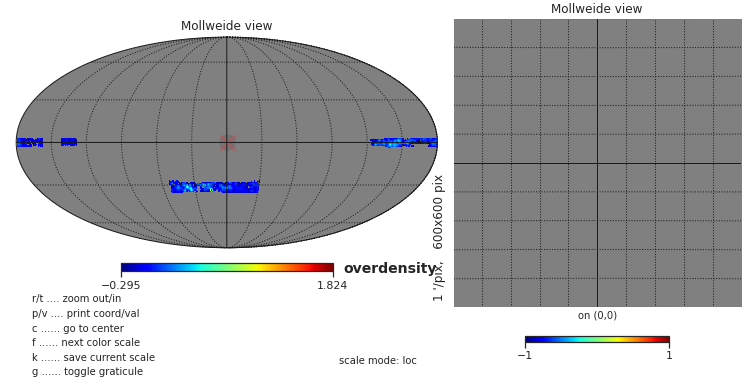

In [23]:
%matplotlib widget
my_mollview(experiment.processed_maps['g'], unit='overdensity', fwhm=1.4, zoom=True)

06/05/2022 15:13:37 INFO: Sigma is 40.767446 arcmin (0.011859 rad) 
06/05/2022 15:13:37 INFO: -> fwhm is 96.000000 arcmin
06/05/2022 15:13:37 INFO: Sigma is 0.000000 arcmin (0.000000 rad) 
06/05/2022 15:13:37 INFO: -> fwhm is 0.000000 arcmin
06/05/2022 15:13:37 WARNING: 0.0 180.0 -180.0 180.0
06/05/2022 15:13:37 INFO: The interval between parallels is 30 deg -0.00'.
06/05/2022 15:13:37 INFO: The interval between meridians is 30 deg -0.00'.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
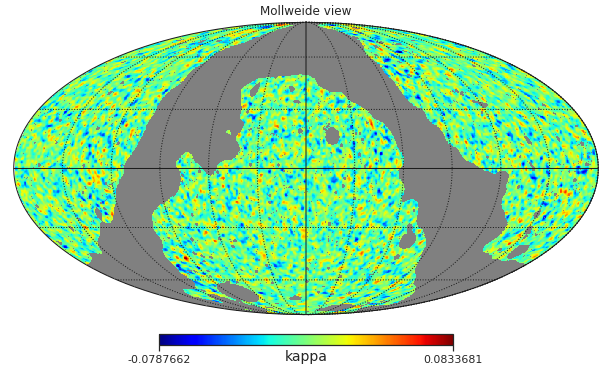

In [25]:
my_mollview(experiment.processed_maps['k'], unit='kappa', fwhm=1.6)